# 7. Spatial Relationships

Last time we got to overlay our point parcel data for Berkeley on top of the Berkeley outline.

<br>

**INSTRUCTOR NOTES**:
- Datasets used:
    - "../notebook_data/BerkeleyCityLimits.zip"
    - "../outdata/berkeley_parcels_gdf.json"

- Expected time to complete:
    - Lecture + Questions: 10 minutes
    - Challenges: 5 minutes
 
<br><br> 
<div style="display:inline-block;vertical-align:top;">
    <img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">
 
 

#### Question (as a form of review!)
</div>

Describe what we saw on our last plot and what we wanted to improve.



<br>

### Import Packages

In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib # base python plotting library
import matplotlib.pyplot as plt # submodule of matplotlib

# To display plots, maps, charts etc in the notebook
%matplotlib inline  

## 7.1 Spatial Relationship Queries



[Spatial relationship queries](https://en.wikipedia.org/wiki/Spatial_relation) consider how two geometries or sets of geometries relate to one another in space. 

<img src="https://upload.wikimedia.org/wikipedia/commons/5/55/TopologicSpatialRelarions2.png" height="300px"></img>


Here is a list of the most commonly used GeoPandas methods to test spatial relationships.

- [within](http://geopandas.org/reference.html?highlight=distance#geopandas.GeoSeries.within)
- [contains](http://geopandas.org/reference.html?highlight=distance#geopandas.GeoSeries.contains) (the inverse of `within`)
- [intersects](http://geopandas.org/reference.html?highlight=distance#geopandas.GeoSeries.intersects)

<br>
There several other GeoPandas spatial relationship predicates but they are more complex to properly employ. For example the following two operations only work with geometry that are completely aligned.

- [touches](http://geopandas.org/reference.html?highlight=distance#geopandas.GeoSeries.touches)
- [equals](http://geopandas.org/reference.html?highlight=distance#geopandas.GeoSeries.equals)


All of these methods takes the form:

    Geoseries.contains(geometry)

<br>
<div style="display:inline-block;vertical-align:top;">
    <img src="../../assets/images/light_bulb.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">

#### Question
</div>

What spatial relationship operation should we use to help us in our Berkeley parcel analysis?

1. `within`
2. `contains`
3. `intersects`
4. `touches`
5. `equals`

    


## 7.2 Berkeley city limits and parcel data

In the last notebook we looked at how to overlay our Berkeley city limits with our parcels data (after making sure the CRS was the same). Can you remember what was wrong with the overlay?

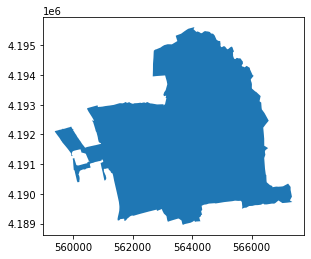

In [2]:
berkeley_outline = gpd.read_file("zip://../notebook_data/BerkeleyCityLimits.zip")
berkeley_outline.plot()

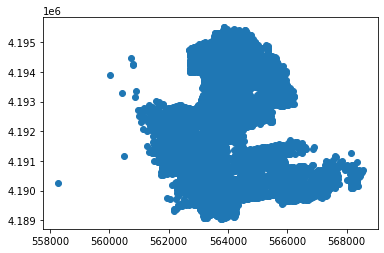

In [3]:
berkeley_parcels_gdf = gpd.read_file("../outdata/berkeley_parcels_gdf.json", driver="GeoJSON")
berkeley_parcels_gdf = berkeley_parcels_gdf.loc[berkeley_parcels_gdf['SIT_CITY']== 'Berkeley'].copy().reset_index()
berkeley_parcels_gdf.plot()

Let's double check that the crs is the same

In [4]:
berkeley_outline.crs == berkeley_parcels_gdf.crs

True

If you said `intersects` for the above question, you're right! Not let's go ahead and use that operation to determine what parcels are actually within the Berkeley City Limits.

In [5]:
berkeley_parcels_new = berkeley_parcels_gdf[berkeley_parcels_gdf.intersects(berkeley_outline['geometry'].squeeze())]

Let's plot our results

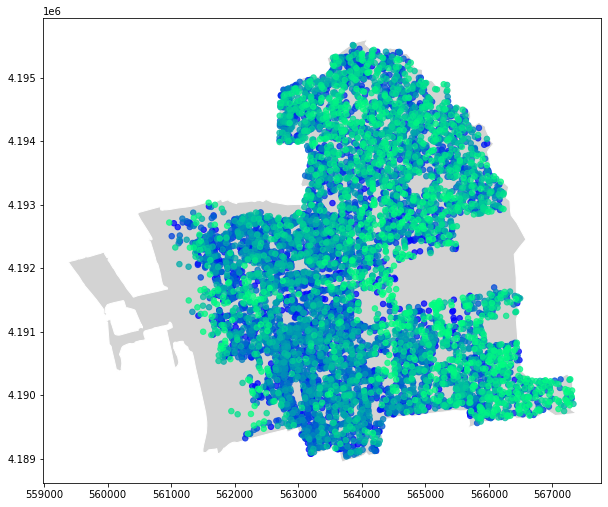

In [6]:
# Set up the plot with a bigger size
fig, ax = plt.subplots(figsize = (10,10)) 


# Add the census tract polygons as our background layer
berkeley_outline.plot(color='lightgrey',
                    edgecolor='white',
                    ax=ax)

# Add the points to the map
berkeley_parcels_new.sort_values(by='totvalue2').plot(ax=ax,
                                                      legend=True, 
                                                      cmap="winter",
                                                      alpha=0.75,
                                                      markersize=30,
                                                      vmin=1)  # Set a value for the low vis value

plt.show()

Don't get to save out your work!

In [7]:
berkeley_parcels_new.to_file("../outdata/berkeley_parcels_gdf_limited.json", driver="GeoJSON")

<div style="display:inline-block;vertical-align:top;">
    <img src="../../assets/images/B00E4437-6C05-4635-8A9D-8787970C97F9_1_105_c.jpeg" align=center width=600 > 
</div>  
<div style="display:inline-block;">

## 7.3 Challenge
1. Try out different spatial relationship commands. 
2. Plot them! 
3. What questions are we answering by doing these instead of `intersects`?

In [ ]:
# Your code here

---
<div style="display:inline-block;vertical-align:middle;">
<a href="https://dlab.berkeley.edu/" target="_blank"><img src ="../../assets/images/dlab_logo.png" width="75" align="left">
</a>
</div>

<div style="display:inline-block;vertical-align:middle;">
    <div style="font-size:larger">&nbsp;D-Lab @ University of California - Berkeley</div>
    <div>&nbsp;Team Geo<div>
</div>